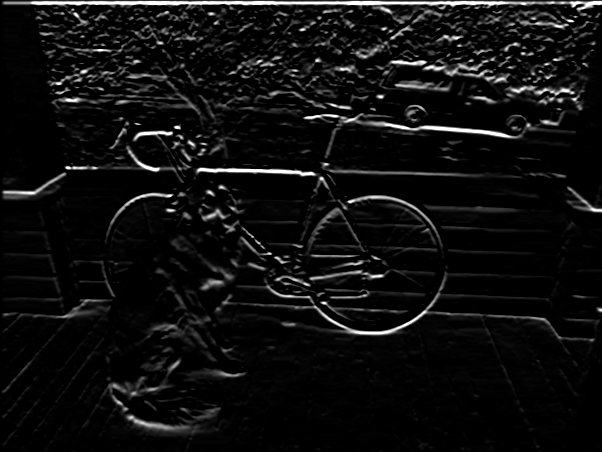

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def convolution(image,kernel):
    img_row,img_column=image.shape
    #kernel_size=kernel.shape[0]
    #padding_width=(kernel_size-1)//2
    output=np.zeros(image.shape)
    padded_image=np.zeros((img_row+kernel.shape[0]-1,img_column+kernel.shape[1]-1))
    padded_image[kernel.shape[0]-1:kernel.shape[0]-1+img_row,kernel.shape[1]-1:kernel.shape[1]-1+img_column]=image
    for j in range(img_column):
        for i in range(img_row):
            output[i,j]=np.sum(padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1]]*kernel)
    return output

x_direction_kernel=np.array([[-1,0,1],
                             [-2,0,2],
                             [-1,0,1]])

y_direction_kernel=np.array([[-1,-2,-1],
                             [ 0, 0, 0],
                             [ 1, 2, 1]])

gaussian_blurr=np.array([[1,  4,  6,  4, 1],
                         [4, 16, 24, 16, 4],
                         [6, 24, 36, 24, 6],
                         [4, 16, 24, 16, 4],
                         [1,  4,  6,  4, 1]])/256

file="edgedetection.png"
im=rgb2gray(np.array(Image.open(file)))
#intensity = [[sum(im[x, y]) / 3 for y in range(im.shape[1])] for x in range(im.shape[0])]
im=convolution(im,gaussian_blurr)
im=convolution(im,y_direction_kernel)
new_img=Image.fromarray(im).convert('RGB')
new_img.save('ykernel.png')
Image.open('ykernel.png')